Import thư viện

In [12]:
import numpy as np
import pandas as pd


1. Đọc dữ liệu lên DataFrame

In [13]:
thietbi = pd.read_csv('../data/thietbi.csv')
nguoidung_thietbi = pd.read_csv('../data/nguoidung_thietbi.csv')
nguoidung_sudung = pd.read_csv('../data/nguoidung_sudung.csv')

2. Vẽ mô hình quan hệ (ERD) từ bảng dữ liệu trên

3. Đổi tên các cột dữ liệu cần thiết

In [14]:
thietbi.rename(columns={'Retail Branding': 'Branding', 'Marketing Name': 'MarketingName'}, inplace=True)

In [15]:
thietbi.head(5)

,Branding,MarketingName,Device,Model
0,NaN,NaN,AD681H,Smartfren Andromax AD681H
1,NaN,NaN,FJL21,FJL21
2,NaN,NaN,T31,Panasonic T31
3,NaN,NaN,hws7721g,MediaPad 7 Youth 2
4,3Q,OC1020A,OC1020A,OC1020A


4. Trộn bảng nguoidung_sudung và nguoidung_thietbi thông qua inner join để được bảng
kết quả có các cột sau: [outgoing_mins_per_month, outgoing_sms_per_month,
monthly_mb, use_id, platform, device]

In [16]:
dfKetQua = pd.merge(nguoidung_sudung,
                    nguoidung_thietbi[['use_id', 'platform', 'device']],
                    on='use_id')

In [17]:
dfKetQua.head(5)

,outgoing_mins_per_month,outgoing_sms_per_month,monthly_mb,use_id,platform,device
0,21.97,4.82,1557.33,22787,android,GT-I9505
1,1710.08,136.88,7267.55,22788,android,SM-G930F
2,1710.08,136.88,7267.55,22789,android,SM-G930F
3,94.46,35.17,519.12,22790,android,D2303
4,71.59,79.26,1557.33,22792,android,SM-G361F


Hoặc dùng left-join tùy theo nhu cầu

In [7]:
# hoặc left-join
dfKetQua = pd.merge(nguoidung_sudung,
                    nguoidung_thietbi[['use_id', 'platform', 'device']],
                    on='use_id', how='left')

5. Tiếp tục inner-join bảng thietbi và dfKetQua để có thêm 2 cột Model và Branding trong
bảng kết quả cuối cùng. Lưu ý ở đây khóa liên kết sẽ khác tên

In [18]:
# inner-join
dfKetQua = pd.merge(dfKetQua,
                    thietbi[['Branding', 'Model']],
                    left_on='device', right_on='Model')

Hoặc left-join

In [9]:
# left-join
dfKetQua = pd.merge(dfKetQua,
                    thietbi[['Branding', 'Model']],
                    left_on='device',
                    right_on='Model', how='left')

6. Hãy liệt kê 5 dòng đầu tiên các mẫu thiết bị (cột device) bắt đầu bằng GT

In [19]:
dfKetQua[dfKetQua.device.str.startswith('GT')].head(5)

,outgoing_mins_per_month,outgoing_sms_per_month,monthly_mb,use_id,platform,device,Branding,Model
0,21.97,4.82,1557.33,22787,android,GT-I9505,Samsung,GT-I9505
1,69.80,14.70,25955.55,22801,android,GT-I9505,Samsung,GT-I9505
2,249.26,253.22,1557.33,22875,android,GT-I9505,Samsung,GT-I9505
3,249.26,253.22,1557.33,22876,android,GT-I9505,Samsung,GT-I9505
4,83.46,114.06,3114.67,22880,android,GT-I9505,Samsung,GT-I9505


7. Hãy thống kê trung bình số phút hàng tháng, trung bình sms và trung bình data, số lượng sử dụng của các nhãn hàng

In [23]:
dfKetQua.groupby('Branding').agg({
    'outgoing_mins_per_month':'mean',
    'outgoing_sms_per_month':'mean',
    'monthly_mb':'mean',
    'use_id':'count'
})

,outgoing_mins_per_month,outgoing_sms_per_month,monthly_mb,use_id
Branding,,,,
HTC,299.842955,93.059318,5144.077955,44
Huawei,81.526667,9.500000,1561.226667,3
LGE,111.530000,12.760000,1557.330000,2
Lava,60.650000,261.900000,12458.670000,2
Lenovo,215.920000,12.930000,1557.330000,2
Motorola,95.127500,65.666250,3946.500000,16
OnePlus,354.855000,48.330000,6575.410000,6
Samsung,191.010093,92.390463,4017.318889,108
Sony,177.315625,40.176250,3212.000625,16


8. Trực quan số lượng người dùng các nhãn hàng

e:\LAP TRINH PYTHON\LT PTDL 1\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
e:\LAP TRINH PYTHON\LT PTDL 1\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
e:\LAP TRINH PYTHON\LT PTDL 1\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


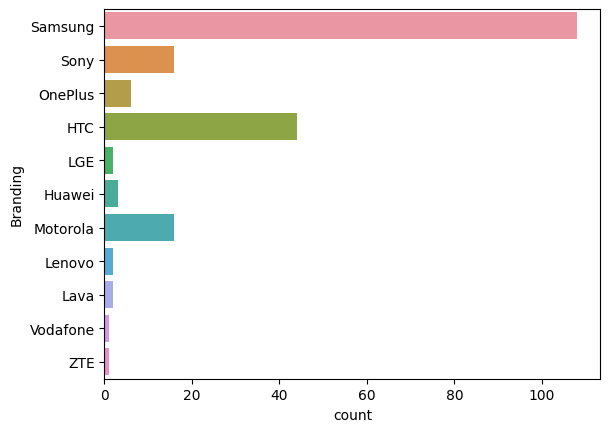

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(y='Branding', data=dfKetQua)
plt.show()

9. Trực quan hóa dữ liệu trung bình phút gọi, trung bình sms và dung lượng sử dụng trên từng nhóm nhãn hàng bán lẻ

e:\LAP TRINH PYTHON\LT PTDL 1\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
e:\LAP TRINH PYTHON\LT PTDL 1\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
e:\LAP TRINH PYTHON\LT PTDL 1\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


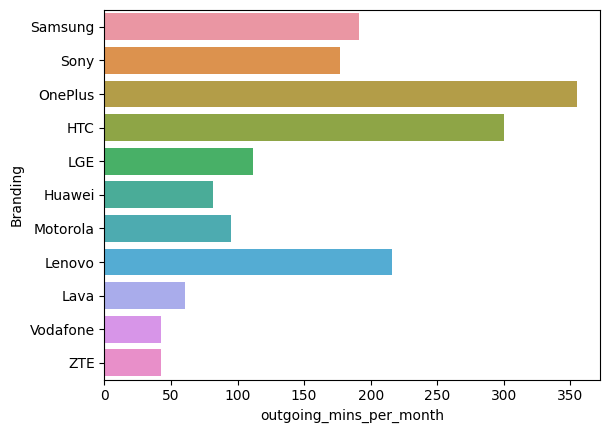

In [25]:
import numpy as np
sns.barplot(y='Branding', x='outgoing_mins_per_month',
            data=dfKetQua, estimator=np.mean, errorbar=None, orient='horizontal')
plt.show()